# Загрузка Pandas и очистка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('main_task.csv')
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


# Рассмотрим название столбцов

In [3]:
df.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA'],
      dtype='object')

# Рассмотрим столбцы

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


Выводы: данные заполнены не по всем столбцам. Всего 3 столбца с данными типа float64

## Начнет рассмотрение столбцов

# 1.Restaurant_id
 идентификационный номер ресторана / сети ресторанов

In [5]:
df['Restaurant_id'].value_counts()

id_436      18
id_227      18
id_871      18
id_633      18
id_71       17
            ..
id_15831     1
id_15019     1
id_11473     1
id_9157      1
id_10462     1
Name: Restaurant_id, Length: 11909, dtype: int64

In [6]:
df['Restaurant_id'].describe()

count      40000
unique     11909
top       id_436
freq          18
Name: Restaurant_id, dtype: object

Есть повторяющиеся id. Сетевые рестораны

In [7]:
df['Restaurant_id_new'] = df['Restaurant_id'].apply(lambda x: x[3:]) # уберем первые буквы, для использования в модели 

In [8]:
df['Restaurant_id_new'] = df['Restaurant_id_new'].astype(float)

# 2.Cuisine Style
кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане

In [9]:
df['Cuisine Style'].value_counts()

['Italian']                                                  1032
['French']                                                    805
['Spanish']                                                   695
['French', 'European']                                        405
['Cafe']                                                      403
                                                             ... 
['Wine Bar', 'Brew Pub']                                        1
['Sushi', 'Asian', 'Japanese', 'Fast Food', 'Thai']             1
['Irish', 'Bar', 'Gastropub']                                   1
['Bar', 'European', 'Pub', 'Swedish']                           1
['American', 'Pizza', 'Fast Food', 'Vegetarian Friendly']       1
Name: Cuisine Style, Length: 9007, dtype: int64

cамая популярная кухня Итальянская

In [10]:
df['Cuisine Style'].describe()

count           30717
unique           9007
top       ['Italian']
freq             1032
Name: Cuisine Style, dtype: object

In [11]:
df['Cuisine Style'] = df['Cuisine Style'].fillna('No_answer') # заменяем пустные значения на "без ответа" 

In [12]:
def count_cuisine(x): # фунцкия считающая количество видов кухонь в ресторане
    x = x.replace('[','')
    x = x.replace(']', '')
    x = x.strip()
    x = [style.strip() for style in x.split(',')]
    x = [style for style in x if len(style) > 0]
    return len(x)

In [13]:
df['number_cuisine'] = df['Cuisine Style'].apply(count_cuisine)

In [14]:
df['number_cuisine'].head(10)

0    3
1    1
2    7
3    1
4    3
5    1
6    2
7    1
8    1
9    3
Name: number_cuisine, dtype: int64

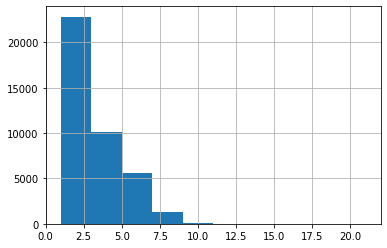

In [15]:
df['number_cuisine'].hist()

In [16]:
df['number_cuisine'].describe()

count    40000.000000
mean         2.622400
std          1.817292
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         21.000000
Name: number_cuisine, dtype: float64

большинство ресторанов имеет 2 кухни. Заполним пустоты этим значением

In [17]:
df['number_cuisine'] = df['number_cuisine'].replace('No_answer', '2')

In [18]:
df['number_cuisine'].describe()

count    40000.000000
mean         2.622400
std          1.817292
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         21.000000
Name: number_cuisine, dtype: float64

рассмотрим границы выбросов

In [19]:
median = df['number_cuisine'].median()
IQR = df['number_cuisine'].quantile(0.75) - df['number_cuisine'].quantile(0.25)
perc25 = df['number_cuisine'].quantile(0.25)
perc75 = df['number_cuisine'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 1.0, 75-й перцентиль: 4.0, IQR: 3.0,  Границы выбросов: [-3.5, 8.5].


In [20]:
(df['number_cuisine']>8.5).sum()

100

число выбросов не значительно, 100 штук. Не будем удалять данную информацию, в жизни всё может быть

# 3.Price Range
диапазон цен в ресторане

In [21]:
df['Price Range'].value_counts()

$$ - $$$    18412
$            6279
$$$$         1423
Name: Price Range, dtype: int64

большинство ресторанов имеет средний диапазон цен. Применим к пустым значениям этот диапазон

In [22]:
df['Price Range'] = df['Price Range'].fillna('$$ - $$$') # заменяем пустные значения

In [23]:
def price(x): # функция заменяющая обозначения градацией цен
        x = x.replace('$$ - $$$', '2')
        x = x.replace('$$$$', '3')
        x = x.replace('$', '1')
        return x

In [24]:
df['price_new'] = df['Price Range'].apply(price)
df['price_new'].value_counts()

2    32298
1     6279
3     1423
Name: price_new, dtype: int64

In [25]:
df['price_new'] = df['price_new'].astype(int)

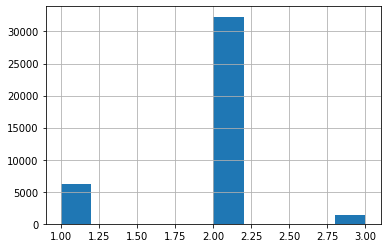

In [26]:
df['price_new'].hist()

большинство ресторанов со средним ценовым позиционированием

# 4. Reviews. Дельта по датам
данные о двух отзывах, которые отображаются на сайте ресторана

In [27]:
df['Reviews'].value_counts()

[[], []]                                                                                                                6471
[['The real codido madrileño'], ['03/31/2017']]                                                                            2
[['ok for beer, not for dinner'], ['12/20/2017']]                                                                          2
[['Nice restaurant in Madrid', 'Highly reccomended'], ['11/10/2017', '05/21/2017']]                                        2
[['Sat night', 'Can\'t even explain.. "A" place.. A "100...'], ['10/22/2017', '05/11/2017']]                               2
                                                                                                                        ... 
[['hard to find but good once you get there', 'Cozy but limited menu'], ['06/15/2017', '09/26/2017']]                      1
[['Nice, small restaurant, hard to find :)', 'Authentic Polish food in a cozy place'], ['12/23/2017', '12/10/2017']]       1


пустых отзывов много. Посчитаем разницу между этими отзывами

In [28]:
def date_Reviews(x): # вытащим даты отзывов в отдельные столбцы и посчитаем разницу
    if x == '[[], []]':
        return []
    else:
        x = x.replace(']]', '')
        x = x.replace("'", '')
        x = x.split('], [')[1]
        x = x.split(', ')
        return x

In [29]:
df['Dates of Reviews'] = df['Reviews'].apply(date_Reviews) # создадим 2 столбца: первый и последний отзыв
df[['Date_last', 'Date_first']] = pd.DataFrame(df['Dates of Reviews'].tolist()) 

In [30]:
df['Date_last'].value_counts()

01/07/2018    486
01/03/2018    433
01/06/2018    396
01/08/2018    377
01/05/2018    366
             ... 
06/17/2012      1
05/18/2010      1
10/22/2011      1
02/17/2013      1
10/22/2010      1
Name: Date_last, Length: 1880, dtype: int64

In [31]:
df['Date_first'].value_counts()

01/03/2018    194
12/30/2017    174
01/04/2018    167
01/01/2018    166
12/22/2017    156
             ... 
03/31/2014      1
05/19/2013      1
10/31/2012      1
06/11/2012      1
03/31/2011      1
Name: Date_first, Length: 1951, dtype: int64

In [32]:
df['Date_last'] = df['Date_last'].fillna('01/07/2018') # заменим пустные значения самыми часто встречаемыми
df['Date_first'] = df['Date_first'].fillna('01/03/2018')

In [33]:
df['Date_last'] = pd.to_datetime(df['Date_last'])
df['Date_first'] = pd.to_datetime(df['Date_first'])

In [34]:
df['Timedelta'] = df.apply(lambda x: x['Date_last'] - x['Date_first'], axis = 1)
df['Timedelta'].head(10)

0    41 days
1   382 days
2     2 days
3     4 days
4   272 days
5   108 days
6   -93 days
7   613 days
8     4 days
9   225 days
Name: Timedelta, dtype: timedelta64[ns]

In [35]:
def zero(x):
    x = x.replace('-', '')
    return x

In [36]:
df['Timedelta'] = df['Timedelta'].astype(str)

In [37]:
df['Timedelta_new'] = df['Timedelta'].apply(zero)

In [38]:
df['Timedelta_new'].head(10)

0     41 days 00:00:00.000000000
1    382 days 00:00:00.000000000
2      2 days 00:00:00.000000000
3      4 days 00:00:00.000000000
4    272 days 00:00:00.000000000
5    108 days 00:00:00.000000000
6    93 days +00:00:00.000000000
7    613 days 00:00:00.000000000
8      4 days 00:00:00.000000000
9    225 days 00:00:00.000000000
Name: Timedelta_new, dtype: object

In [39]:
df['Timedelta_new'] = df['Timedelta_new'].apply(lambda x: x.replace('00:00:00.000000000', ''))  
df['Timedelta_new'] = df['Timedelta_new'].apply(lambda x: x.replace(' days', '')) 
df['Timedelta_new'] = df['Timedelta_new'].apply(lambda x: x.replace(' +', '')) 
df['Timedelta_new'] = df['Timedelta_new'].apply(lambda x: x.replace(' ', '')) 

In [40]:
df['Timedelta_new'].head(10)

0     41
1    382
2      2
3      4
4    272
5    108
6     93
7    613
8      4
9    225
Name: Timedelta_new, dtype: object

In [41]:
df['Timedelta_new'] = df['Timedelta_new'].astype(float) 

In [42]:
df['Timedelta_new'].describe()

count    40000.000000
mean       170.724500
std        315.959283
min          0.000000
25%          7.000000
50%         55.000000
75%        185.000000
max       5005.000000
Name: Timedelta_new, dtype: float64

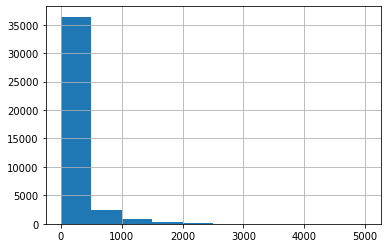

In [43]:
df['Timedelta_new'].hist()

самое втречаемое значение разницы в днях между отзывами 55 дней

# 5.Reviews. Тональность в отзывах

предполагаю, что тональность отзыва отражает рейтинг ресторана

In [44]:
df['Reviews'] = df['Reviews'].apply(lambda x: x.lower()) # делаем регистр одинаковым для удобства поиска ключевых слов

In [45]:
words_good = ['good','great','best','wonderful','nice','excellent'] # 3-положительный, 2-нейтральный, 1-отрицательный отзыв
words_bad = ['disappointing','overpriced','bad','horrible','grumpiest','awful']
def find_word(cell):
    if cell is not None:
        for word in words_good:
            if word in cell:
                return 3
        for word in words_bad:
            if word in cell:
                return 1
    return 2 # если пустные, то ставим 2. считаем что отзыв нейтральный

In [46]:
df['reviews_sense'] = df['Reviews'].apply(find_word)
df['reviews_sense'].value_counts()

3    20671
2    18640
1      689
Name: reviews_sense, dtype: int64

ресторанов с положительными отзывовами больше всего

# 6.City 
город, в котором находится ресторан

In [47]:
df['City'].value_counts()

London        5757
Paris         4897
Madrid        3108
Barcelona     2734
Berlin        2155
Milan         2133
Rome          2078
Prague        1443
Lisbon        1300
Vienna        1166
Amsterdam     1086
Brussels      1060
Hamburg        949
Munich         893
Lyon           892
Stockholm      820
Budapest       816
Warsaw         727
Dublin         673
Copenhagen     659
Athens         628
Edinburgh      596
Zurich         538
Oporto         513
Geneva         481
Krakow         443
Oslo           385
Helsinki       376
Bratislava     301
Luxembourg     210
Ljubljana      183
Name: City, dtype: int64

больше всего ресторанов в Лондоне. Чтобы использовать данный параметр в модели перевернем в столбцы города

In [48]:
city_all = set() # создадим справочник городов
for x in df['City']:
        city_all.add(x) 
print(city_all)

{'Geneva', 'Hamburg', 'Berlin', 'Lyon', 'Copenhagen', 'Krakow', 'Madrid', 'Oslo', 'Dublin', 'London', 'Paris', 'Bratislava', 'Budapest', 'Rome', 'Stockholm', 'Zurich', 'Oporto', 'Edinburgh', 'Helsinki', 'Lisbon', 'Prague', 'Barcelona', 'Warsaw', 'Amsterdam', 'Munich', 'Ljubljana', 'Athens', 'Brussels', 'Luxembourg', 'Milan', 'Vienna'}


In [49]:
def find_city(cell): # функция проставления наличие или отсутствия элемента в ячейке
    if x in cell:
        return 1
    return 0

In [50]:
for x in city_all:
    df[x] = df['City'].apply(find_city) # создали столбцы с названиями городов, в которых находятся рестораны

In [51]:
df.head(2)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,Barcelona,Warsaw,Amsterdam,Munich,Ljubljana,Athens,Brussels,Luxembourg,Milan,Vienna
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['good food at your doorstep', 'a good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,...,0,0,0,0,0,0,0,0,0,0
1,id_1535,Stockholm,No_answer,1537.0,4.0,$$ - $$$,10.0,"[['unique cuisine', 'delicious nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,...,0,0,0,0,0,0,0,0,0,0


# 7. Численность населения городов

предполагаю, что численность населения влияет на рейтинг ресторана. По словарю подставим численность населения городов в дата сете

In [52]:
Сity_pop_dict = {'London' : 8908, 'Paris' : 2206, 'Madrid' : 3223, 'Barcelona' : 1620, 
                        'Berlin' : 6010, 'Milan' : 1366, 'Rome' : 2872, 'Prague' : 1308, 
                        'Lisbon' : 506, 'Vienna' : 1888, 'Amsterdam' : 860, 'Brussels' : 179, 
                        'Hamburg' : 1841, 'Munich' : 1457, 'Lyon' : 506, 'Stockholm' : 961, 
                        'Budapest' : 1752, 'Warsaw' : 1764, 'Dublin' : 553, 
                        'Copenhagen' : 616, 'Athens' : 665, 'Edinburgh' : 513, 
                        'Zurich' : 415, 'Oporto' : 240, 'Geneva' : 201, 'Krakow' : 769, 
                        'Oslo' : 681, 'Helsinki' : 643, 'Bratislava' : 426, 
                        'Luxembourg' : 119, 'Ljubljana' : 284}

In [53]:
df['Сity_pop'] = df.apply(lambda row: Сity_pop_dict[row['City']], axis = 1)

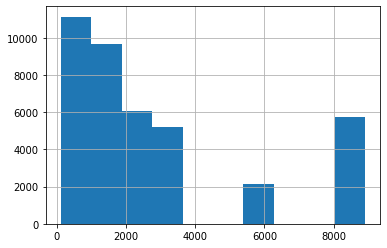

In [54]:
df['Сity_pop'].hist()

# 8. Number of Reviews
количество отзывов о ресторане

In [55]:
df['Number of Reviews'].head(10)

0    194.0
1     10.0
2    688.0
3      3.0
4     84.0
5      2.0
6     50.0
7      9.0
8      NaN
9     55.0
Name: Number of Reviews, dtype: float64

In [56]:
df['Number of Reviews'].value_counts()

2.0       1916
3.0       1636
4.0       1370
5.0       1181
6.0       1018
          ... 
2141.0       1
920.0        1
1404.0       1
979.0        1
1698.0       1
Name: Number of Reviews, Length: 1459, dtype: int64

count    37457.000000
mean       124.825480
std        295.666352
min          2.000000
25%          9.000000
50%         33.000000
75%        115.000000
max       9660.000000
Name: Number of Reviews, dtype: float64

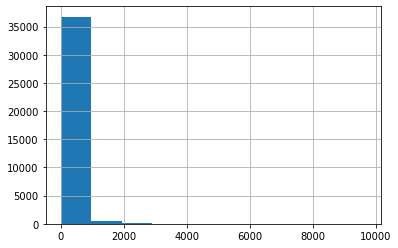

In [57]:
df['Number of Reviews'].hist()
df['Number of Reviews'].describe()

посчитаем медианное число отзывов в городе

In [58]:
Reviews_in_city_median = df.groupby(['City'])['Number of Reviews'].median().sort_values(ascending=False)
Reviews_in_city_median

City
Rome          117.0
Edinburgh      73.0
Milan          50.0
Amsterdam      47.0
Paris          46.0
Dublin         44.0
Oporto         39.5
London         38.0
Copenhagen     35.0
Luxembourg     34.0
Barcelona      34.0
Zurich         32.0
Lyon           31.0
Geneva         31.0
Lisbon         31.0
Munich         29.0
Brussels       28.0
Oslo           28.0
Krakow         28.0
Madrid         27.0
Budapest       24.0
Vienna         22.0
Helsinki       20.0
Prague         20.0
Athens         20.0
Stockholm      19.0
Ljubljana      18.5
Warsaw         17.0
Hamburg        16.0
Berlin         16.0
Bratislava     10.0
Name: Number of Reviews, dtype: float64

заполним пропуски медианным значением по городу

In [59]:
df['Number of Reviews'] = df['Number of Reviews'].fillna(df['City'].apply(lambda x: Reviews_in_city_median[x]))

In [60]:
df['Number of Reviews'].head(10)

0    194.0
1     10.0
2    688.0
3      3.0
4     84.0
5      2.0
6     50.0
7      9.0
8     22.0
9     55.0
Name: Number of Reviews, dtype: float64

In [61]:
df['Number of Reviews'] = df['Number of Reviews'].astype(int)
df['Number of Reviews'].describe()

count    40000.000000
mean       118.952325
std        287.032060
min          2.000000
25%         10.000000
50%         32.000000
75%        106.000000
max       9660.000000
Name: Number of Reviews, dtype: float64

In [62]:
median = df['Number of Reviews'].median()
IQR = df['Number of Reviews'].quantile(0.75) - df['Number of Reviews'].quantile(0.25)
perc25 = df['Number of Reviews'].quantile(0.25)
perc75 = df['Number of Reviews'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f = perc25 - 1.5*IQR, l = perc75 + 1.5*IQR))

25-й перцентиль: 10.0, 75-й перцентиль: 106.0, IQR: 96.0,  Границы выбросов: [-134.0, 250.0].


In [63]:
(df['Number of Reviews'] > 300).sum()

3968

число выбросов большое. Не совсем понимаю методогически, что делать с этим. Пока оставляю

# 9.Количество отзывов о ресторанах в городе

посчитаем количество отзывов по городам. Чем больше город, тем больше потребителей

In [64]:
Reviews_in_city_count = df.groupby(['City'])['Number of Reviews'].sum().sort_values(ascending=False)
Reviews_in_city_count

City
London        759401
Rome          590886
Paris         571748
Milan         357787
Barcelona     343924
Madrid        296866
Prague        162225
Lisbon        156340
Amsterdam     154259
Edinburgh     135634
Berlin        133050
Budapest      120779
Dublin        100959
Vienna         91585
Brussels       90037
Lyon           74419
Munich         69186
Oporto         66344
Stockholm      60253
Athens         58819
Copenhagen     57758
Krakow         50819
Warsaw         43444
Hamburg        41792
Zurich         40223
Oslo           35277
Geneva         28878
Helsinki       21732
Luxembourg     16626
Bratislava     14127
Ljubljana      12916
Name: Number of Reviews, dtype: int32

In [65]:
df['Reviews_in_city'] = df['City'].apply(lambda x: Reviews_in_city_count[x])

In [66]:
df['Reviews_in_city'].head()

0    571748
1     60253
2    759401
3    133050
4     69186
Name: Reviews_in_city, dtype: int64

# 10.Ранг ресторана относительно отзывов

делим рейтинг по городу на количество отзывов по городу. Получаем взвешенную оценку рейтинга по отзывам

In [67]:
df['Relative_rank_Reviews'] = df['Ranking'] / df['Reviews_in_city']

In [68]:
df['Relative_rank_Reviews']

0        0.009742
1        0.025509
2        0.000465
3        0.025990
4        0.008976
           ...   
39995    0.001397
39996    0.011091
39997    0.027418
39998    0.014755
39999    0.013491
Name: Relative_rank_Reviews, Length: 40000, dtype: float64

# 11.ID_TA
идентификатор ресторана в базе данных TripAdvisor

In [69]:
df['ID_TA'].head()

0    d1912643
1    d7992032
2    d8632781
3    d1358776
4    d6864963
Name: ID_TA, dtype: object

для использования в модели уберем префикс 'd' чтобы остались только числовые значения

In [70]:
df['ID_TA'] = df['ID_TA'].apply(lambda x: int(x[1:]))

In [71]:
df['ID_TA'].head()

0    1912643
1    7992032
2    8632781
3    1358776
4    6864963
Name: ID_TA, dtype: int64

# 12.Ranking
место, которое занимает данный ресторан среди всех ресторанов своего города

count    40000.000000
mean      3676.028525
std       3708.749567
min          1.000000
25%        973.000000
50%       2285.000000
75%       5260.000000
max      16444.000000
Name: Ranking, dtype: float64

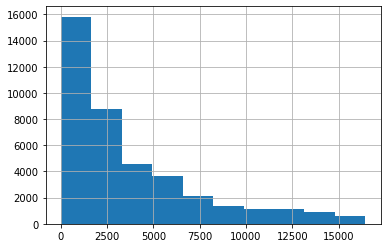

In [72]:
df['Ranking'].hist()
df['Ranking'].describe()

чем выше рейтинг, тем меньше ресторанов. Посмотрим на примере 10 городов распределение Ranking

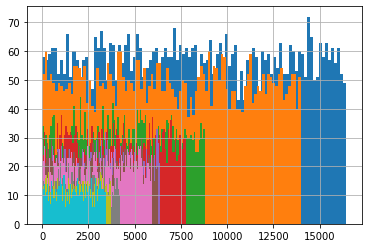

In [73]:
for x in (df['City'].value_counts())[0:10].index:
    df['Ranking'][df['City'] == x].hist(bins=100)
plt.show()

In [74]:
# чем больше город, тем больше Ranking
# отнормируем критерий Ranking по городам City
mean_Ranking_in_City = df.groupby(['City'])['Ranking'].mean() # средний ранг в городе
count_Restorant_in_City = df['City'].value_counts(ascending=False) # число ресторанов в городе
df['mean_Ranking_in_City'] = df['City'].apply(lambda x: mean_Ranking_in_City[x])
df['count_Restorant_in_City'] = df['City'].apply(lambda x: count_Restorant_in_City[x])
df['norm_Ranking_in_Rest_in_City'] = (df['Ranking'] - df['mean_Ranking_in_City']) / df['count_Restorant_in_City']

# 13.URL_TA
URL страницы ресторана на TripAdvosor

In [76]:
df['URL_TA'].head()

0    /Restaurant_Review-g187147-d1912643-Reviews-R_...
1    /Restaurant_Review-g189852-d7992032-Reviews-Bu...
2    /Restaurant_Review-g186338-d8632781-Reviews-RO...
3    /Restaurant_Review-g187323-d1358776-Reviews-Es...
4    /Restaurant_Review-g187309-d6864963-Reviews-Au...
Name: URL_TA, dtype: object

g186338 - после рассмотрения - это код города или страны ресторана. Дубль от информации, которая уже есть.
d779921 - дублирование ID_TA.
Не приносит доп информацию

# ПОСТРОИМ МАТРИЦУ КОРРЕЛЯЦИИ

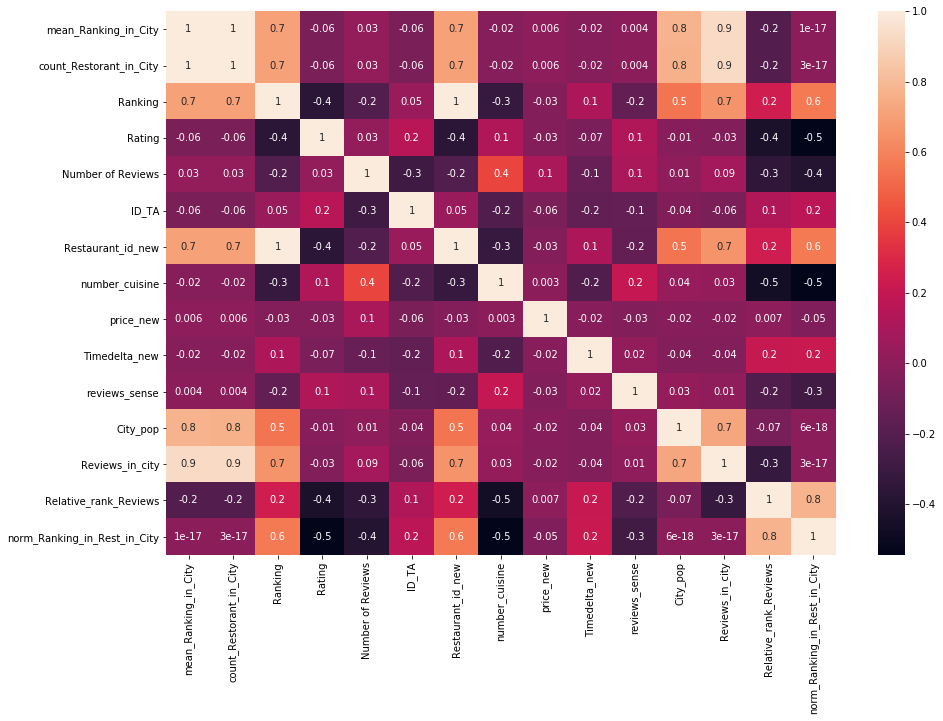

In [77]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df[['mean_Ranking_in_City','count_Restorant_in_City','Restaurant_id', 'Ranking', 'Rating', 'Number of Reviews', 'ID_TA',
       'Restaurant_id_new', 'number_cuisine', 'price_new', 'Timedelta_new',
       'reviews_sense', 'Сity_pop', 'Reviews_in_city',
       'Relative_rank_Reviews', 'norm_Ranking_in_Rest_in_City']].corr(), annot = True, fmt='.1g')

Есть вопросы по применимости матрицы корреляции. Например, если убрать Restaurant_id_new из модели (хотя корреляция равна 1 к Ranking), то MAE увеличивается, хотя по логике должен уменьшаться.
Убираем 'mean_Ranking_in_City' и 'count_Restorant_in_City' с высокой корреляции

# Убираем не информативные столбцы

In [78]:
df = df.drop(['mean_Ranking_in_City','count_Restorant_in_City','Timedelta','City','Cuisine Style','Price Range','Reviews','URL_TA','Dates of Reviews','Date_last','Date_first'], axis = 1)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Restaurant_id                 40000 non-null  object 
 1   Ranking                       40000 non-null  float64
 2   Rating                        40000 non-null  float64
 3   Number of Reviews             40000 non-null  int32  
 4   ID_TA                         40000 non-null  int64  
 5   Restaurant_id_new             40000 non-null  float64
 6   number_cuisine                40000 non-null  int64  
 7   price_new                     40000 non-null  int32  
 8   Timedelta_new                 40000 non-null  float64
 9   reviews_sense                 40000 non-null  int64  
 10  Geneva                        40000 non-null  int64  
 11  Hamburg                       40000 non-null  int64  
 12  Berlin                        40000 non-null  int64  
 13  L

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [80]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Restaurant_id', 'Rating'], axis = 1)
y = df['Rating']

In [81]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [82]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [83]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [84]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [85]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.202206


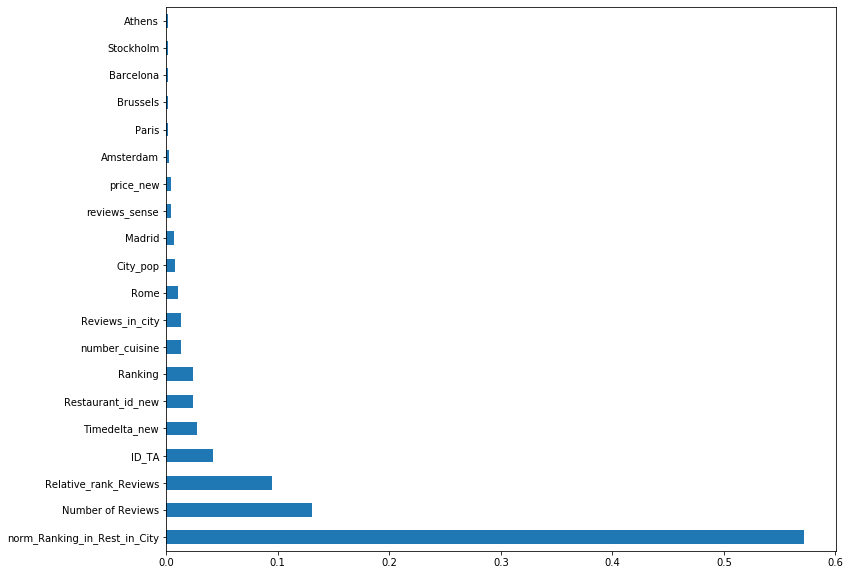

In [86]:
plt.rcParams['figure.figsize'] = (12,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

# Выводы

1.Рассмотрены входящие в изначальный датасет данные. Часть исключена по причине не информативности.  
2.Из имеющихся данных достал новые данные: тональность в отзывах, дельта в дате отзывов.  
3.Заполнены пропуски в данных.  
4.Добавлены внешние данные: численность населения.  
5.Из полученных данных определили параметры, которые больше влияют на рейтинг: ранг отноримиронный по городу, число отзывово, взвешенная оценка рейтинга по отзывам.  

По итогам многих итераций оставлены только метрики в модели. Многие убраны.


# Вопросы

1.Всё же что делать с выбросами.   
2.Если убрать Restaurant_id_new из модели (хотя корреляция равна 1 к Ranking), то MAE увеличивается, хотя по логике должен уменьшаться.
3.Имеется ли механиз подбора наилучшей замены пустот значениями: средний, медианой и тд. Вопрос применительно к количеству отзывов. 